In [1]:
import numpy as np
import pandas as  pd
import statsmodels.api as sm

In [2]:
np.random.seed(123)
nsample = 50
x=np.linspace(0,20,nsample)
#Add constant 1, turn into matrix
X=sm.add_constant(x)
#b0: constant , b1:x1 coefficient
beta=[1,2.5]
#random error
e=np.random.normal(size=nsample)  #normal here mean for normal distribution
y=np.dot(X, beta)+e

In [3]:
sample_df = pd.DataFrame({"y":y,"x1":x})
sample_df.head()

,y,x1
0,-0.085631,0.000000
1,3.017754,0.408163
2,3.323795,0.816327
3,2.554930,1.224490
4,4.503032,1.632653


<Axes: xlabel='x1', ylabel='y'>

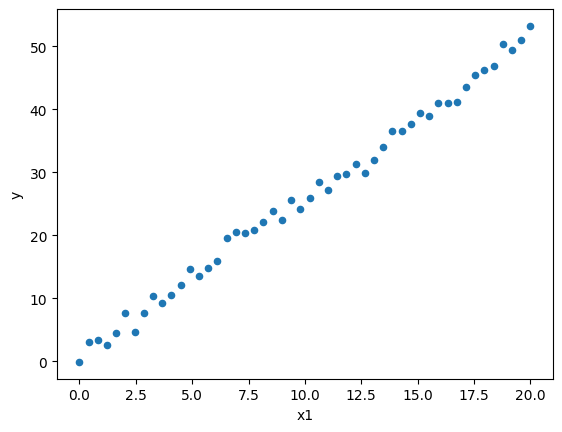

In [4]:
sample_df.plot.scatter("x1","y")

In [5]:
corr_matrix =sample_df.corr(method ='pearson')
print(corr_matrix)

          y       x1
y   1.00000  0.99683
x1  0.99683  1.00000


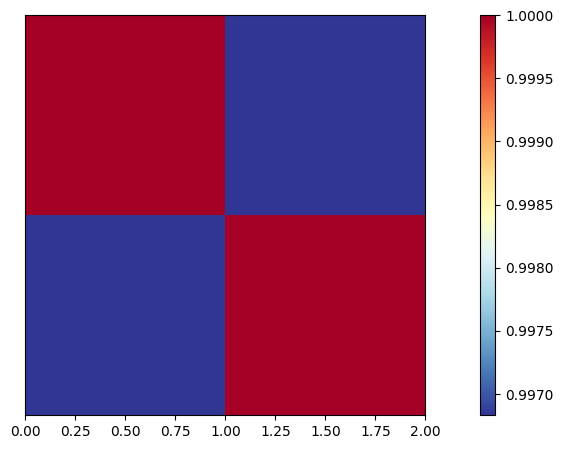

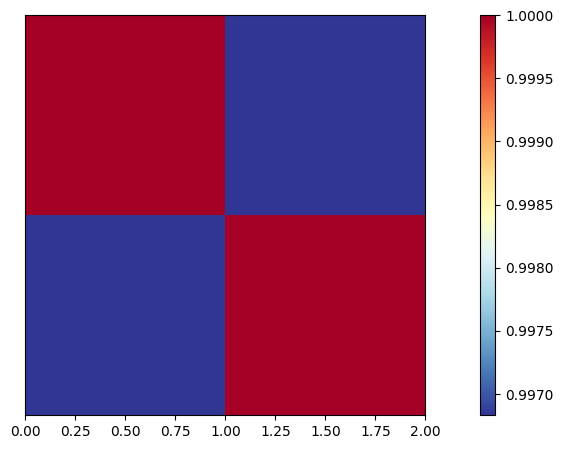

In [6]:
sm.graphics.plot_corr_grid([corr_matrix])

In [11]:
result = sm.OLS(y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7535.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.97e-54
Time:                        16:26:12   Log-Likelihood:                -79.405
No. Observations:                  50   AIC:                             162.8
Df Residuals:                      48   BIC:                             166.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8224      0.337      2.442      0.0

In [8]:
result.params

array([0.82244348, 2.5190828 ])

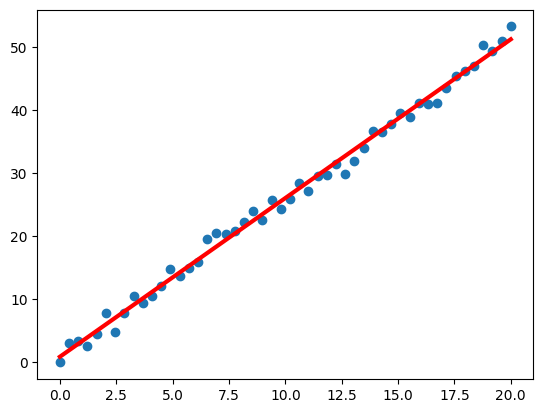

In [9]:
import matplotlib.pyplot as plt
#plot obsered point 
plt.scatter(x,y)
#get slop and constant
b0 ,b1 =result.params[0],result.params[1]
#draw regression line 
plt.plot(x,b0+b1*x,color = 'red',lw=3)